# Task-5


# To explore Business Analytics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
sample_data = pd.read_csv(r'C:\Users\Dell\Desktop\SampleSuperstore.csv')
sample_data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
sample_data.shape

(9994, 13)

Checking null values

In [4]:
sample_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Checking and removing duplicate values

In [5]:
sample_data.duplicated().sum()

17

In [6]:
df = sample_data.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [9]:
df.shape

(9977, 13)

Performing EDA

In [10]:
eda = df.corr()
eda

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


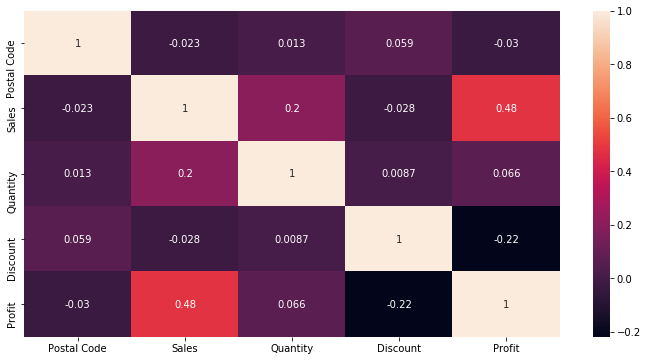

In [11]:
plt.figure(figsize = (12, 6))
sb.heatmap(eda, annot = True)
plt.show()

Visualizing the data

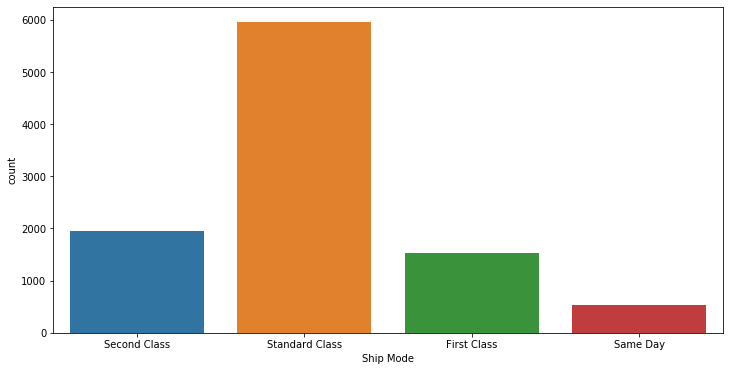

In [12]:
plt.figure(figsize = (12,6))
sb.countplot(x = df["Ship Mode"])
plt.show()

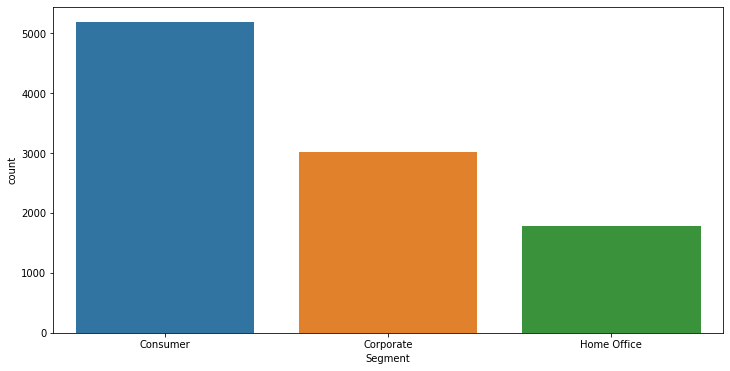

In [13]:
plt.figure(figsize = (12, 6))
sb.countplot(x = df["Segment"])
plt.show()

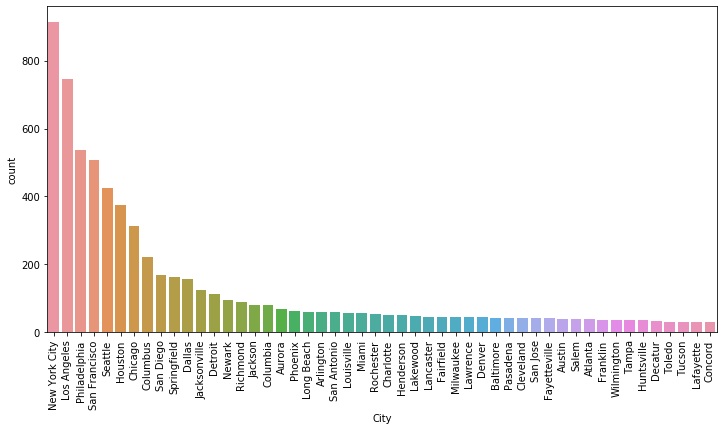

In [14]:
plt.figure(figsize = (12,6))
sb.countplot(x=df['City'],order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation = 90)
plt.show()

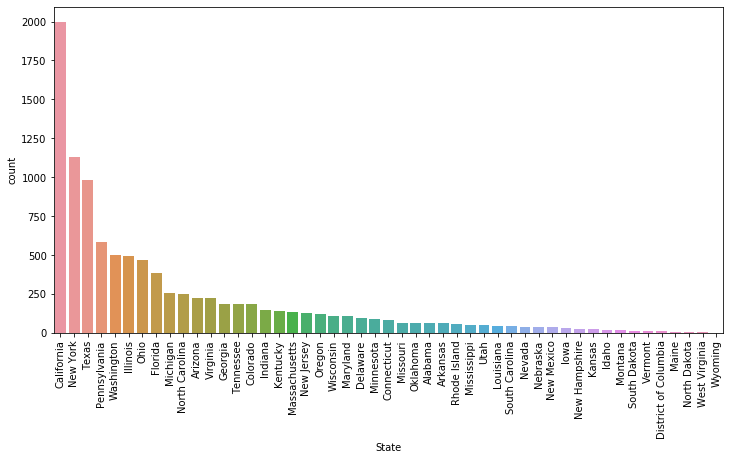

In [15]:
plt.figure(figsize = (12,6))
sb.countplot(x = df["State"],order=(df['State'].value_counts().head(50)).index)
plt.xticks(rotation = 90)
plt.show()

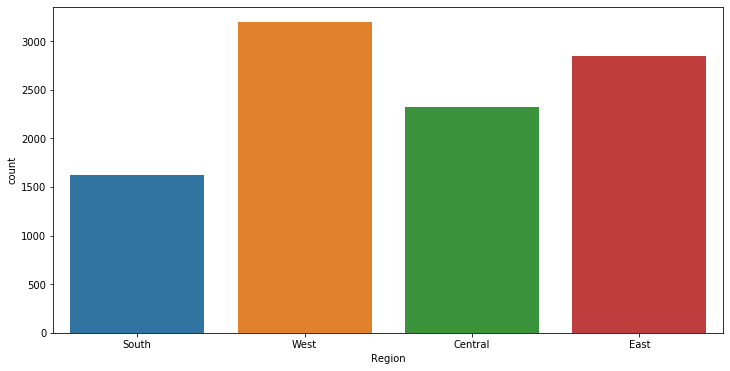

In [16]:
plt.figure(figsize = (12,6))
sb.countplot(x = df["Region"])
plt.show()

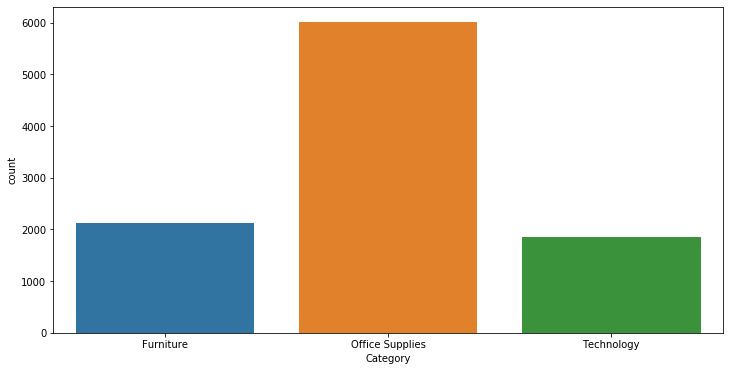

In [17]:
plt.figure(figsize = (12,6))
sb.countplot(x = df["Category"])
plt.show()

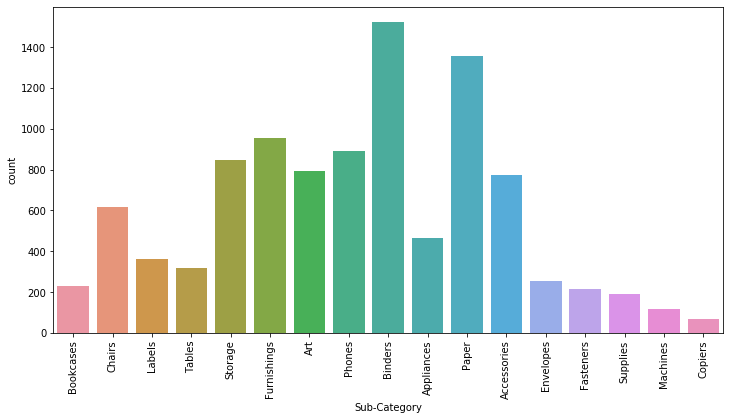

In [18]:
plt.figure(figsize = (12, 6))
sb.countplot(x = df["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

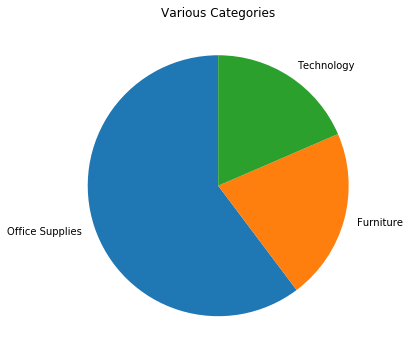

In [19]:
plt.figure(figsize = (12,6))
plt.pie(df['Category'].value_counts(),labels= df['Category'].value_counts().index, startangle=90)
plt.title("Various Categories")
plt.show()

<Figure size 3600x3600 with 0 Axes>

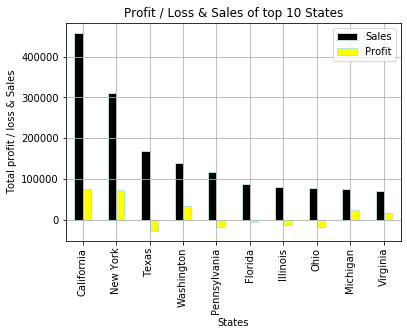

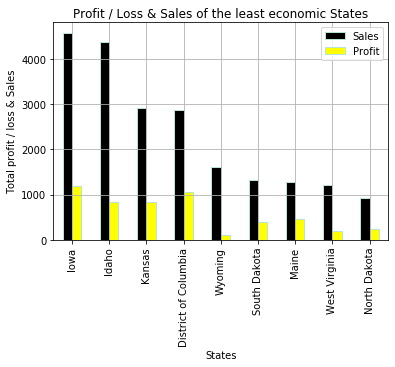

In [20]:
state = df.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False)
plt.figure(figsize = (50,50))
state[:10].plot(kind = "bar",color = ["k","yellow"],edgecolor = "#B6E7CE")
plt.title("Profit / Loss & Sales of top 10 States")
plt.xlabel("States")
plt.ylabel("Total profit / loss & Sales")
plt.grid(True)
state[40:].plot(kind = "bar",color = ["k","yellow"],edgecolor = "#B6E7CE")
plt.title("Profit / Loss & Sales of the least economic States")
plt.xlabel("States")
plt.ylabel("Total profit / loss & Sales")
plt.grid(True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

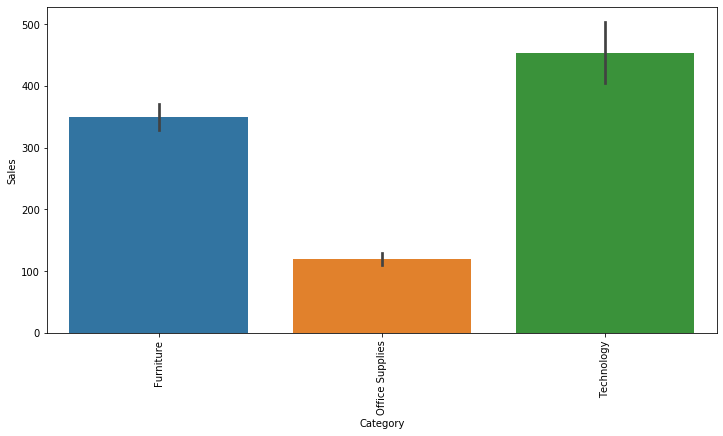

In [21]:
plt.figure(figsize = (12,6))
sb.barplot(x = df["Category"], y = df["Sales"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

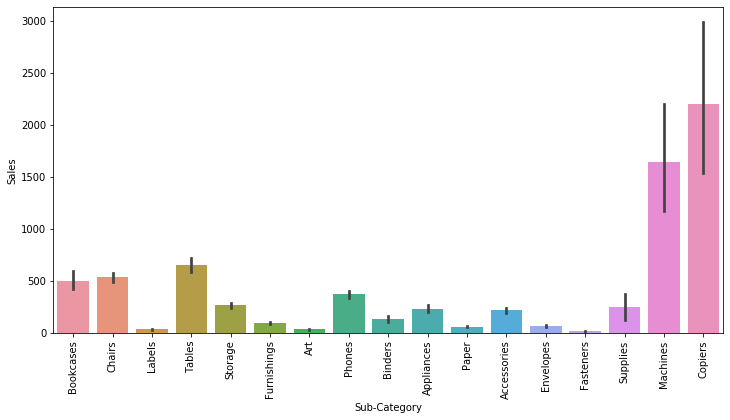

In [22]:
plt.figure(figsize = (12,6))
sb.barplot(x = df["Sub-Category"], y = df["Sales"])
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

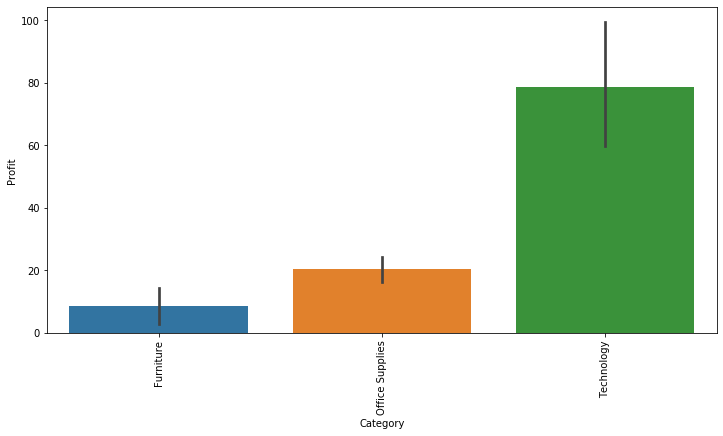

In [23]:
plt.figure(figsize = (12,6))
sb.barplot(x = df["Category"], y = df["Profit"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

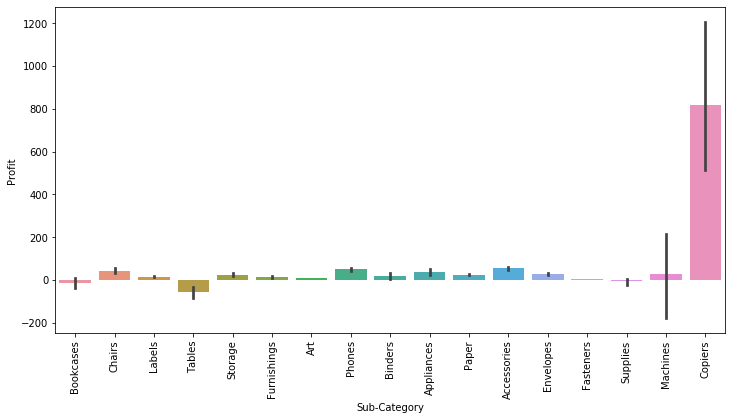

In [24]:
plt.figure(figsize = (12,6))
sb.barplot(x = df["Sub-Category"], y = df["Profit"])
plt.xticks(rotation = 90)